In [106]:
import numpy as np 
import pandas as pd 

In [107]:
df=pd.read_csv("Churn_Modelling.csv")

In [108]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [109]:
df.shape

(10000, 14)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### duplicated rows

In [111]:
df.duplicated().sum()

0

In [112]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [113]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [114]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [115]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Categorical to numerical

In [116]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [117]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Scaling

In [118]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [119]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [120]:
X_train.shape

(8000, 11)

In [121]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 2694 to 235
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   Geography_Germany  8000 non-null   int32  
 9   Geography_Spain    8000 non-null   int32  
 10  Gender_Male        8000 non-null   int32  
dtypes: float64(2), int32(3), int64(6)
memory usage: 656.2 KB


In [123]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [124]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [125]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [126]:
model=Sequential()

In [138]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ARWINDD\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 11)             │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 996 (3.89 KB)

 Trainable params: 442 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 554 (2.17 KB)

In [140]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [141]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7966 - loss: 0.6136 - val_accuracy: 0.7975 - val_loss: 0.5009
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7901 - loss: 0.5074 - val_accuracy: 0.7975 - val_loss: 0.4852
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.4838 - val_accuracy: 0.7975 - val_loss: 0.4589
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7956 - loss: 0.4520 - val_accuracy: 0.7975 - val_loss: 0.4341
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7866 - loss: 0.4398 - val_accuracy: 0.8019 - val_loss: 0.4150
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8168 - loss: 0.3959 - val_accuracy: 0.8363 - val_loss: 0.3953
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8285 - loss: 0.4014 - val_accuracy: 0.8388 - val_loss: 0.3819
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8384 - loss: 0.3756 - val_accuracy: 0.

In [142]:
model.layers[0].get_weights()

[array([[ 1.56359822e-02, -6.91989437e-02,  9.96073931e-02,
         -1.83883011e-01,  4.28425848e-01,  1.66668534e-01,
         -1.91417903e-01,  2.62443364e-01, -9.69748013e-03,
         -1.17183139e-03, -2.20173016e-01],
        [ 6.06014505e-02,  1.48402527e-01,  1.02346373e+00,
         -8.54897797e-01, -7.48804152e-01, -4.74649429e-01,
         -1.58289731e-01, -9.13292244e-02, -3.93133700e-01,
         -1.18049777e+00,  4.67725188e-01],
        [-3.03897504e-02, -2.04291552e-01, -3.58430296e-01,
          5.02311707e-01, -5.82860231e-01, -3.40992063e-01,
          3.11026961e-01,  2.97988445e-01, -8.96058008e-02,
         -3.07937950e-01,  5.99763095e-01],
        [-1.82262454e-02,  4.59291279e-01, -2.78505385e-01,
          6.93973452e-02, -9.97430552e-03, -4.28329080e-01,
         -3.54474217e-01,  1.13059491e-01, -9.30780768e-01,
         -4.36172277e-01, -2.94235051e-01],
        [-1.07866693e+00,  9.35852766e-01,  1.19615130e-01,
         -6.19499795e-02, -1.38945011e-02, -

In [143]:
model.layers[1].get_weights()

[array([[ 0.57239765, -0.088213  ,  0.8345084 , -0.41619924,  0.17516391,
         -0.09733278, -0.09213834, -0.12607841, -0.23122253, -0.10163695,
         -0.67841953],
        [-0.7139405 , -0.29430708,  0.6120609 , -0.54638225,  0.40533185,
         -0.38116166, -0.44898835, -0.18201944, -0.25642845, -0.24750486,
          0.660127  ],
        [-0.16715752, -0.44857076,  0.5247323 , -0.073897  ,  0.05641281,
         -0.15777265,  0.4105891 , -0.13214542,  0.4392681 ,  0.44162816,
         -0.28425613],
        [ 0.3000915 ,  0.00353882, -0.21629909, -0.09169381,  0.22795387,
          0.04862465,  0.61447126,  0.61274403,  0.32999778,  0.3285459 ,
          0.03686439],
        [-0.3935645 , -0.06435397, -0.14257754, -0.13607989, -0.13378999,
          0.17021862,  0.4197992 , -0.12774207, -0.39790678,  0.22148927,
         -0.19471528],
        [-0.00973455,  0.25678447, -0.25485647,  0.43487838, -0.43508253,
          0.08997147, -0.19180664,  0.62301666, -0.13161676, -0.0874906

In [144]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [145]:
y_pred=np.where(y_log>0.5,1,0)

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.845

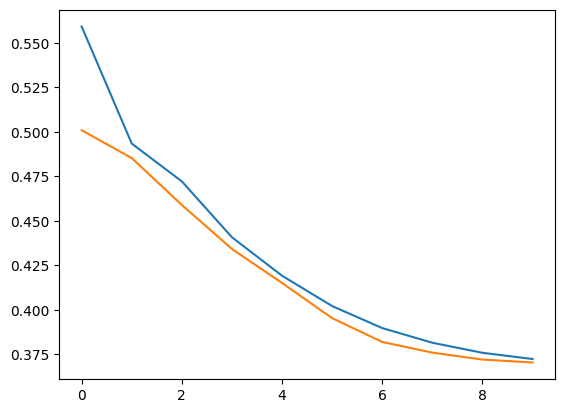

In [148]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

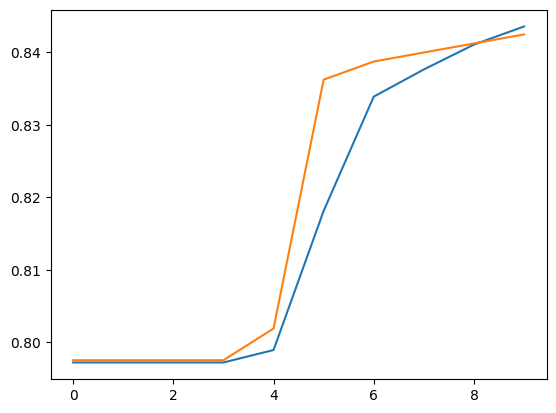

In [149]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])